# Preprocessing: Discrete Cosine Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageOps

def print_images(images, nrows=1, ncols=1, titles=None):
    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
        ax.set_title(label)
        
def dct_compression(image, num_coefs):
    # Get the pixel values
    pixels = np.array(image)
    
    # Perform the DCT
    dct = dct_2D(pixels)

    # Keep only the top num_coefs DCT coefficients
    dct[num_coefs:,:] = 0
    dct[:,num_coefs:] = 0

    # Perform the inverse DCT
    compressed_image = idct_2D(dct)

    # Convert to [0, 255] 
    compressed_image = (compressed_image - np.min(compressed_image)) / (np.max(compressed_image) - np.min(compressed_image)) * 255
    compressed_image = compressed_image.astype(np.uint8)
    return compressed_image

def dct_2D(pixels):
    N, M = pixels.shape
    result = np.zeros((N, M))
    for u in range(N):
        for v in range(M):
            cu = np.sqrt(1/N) if u == 0 else np.sqrt(2/N)
            cv = np.sqrt(1/M) if v == 0 else np.sqrt(2/M)
            temp = 0
            for x in range(N):
                for y in range(M):
                    temp += pixels[x][y] * np.cos(np.pi * (2*x + 1) * u / (2 * N)) * np.cos(np.pi * (2*y + 1) * v / (2 * M))
            result[u][v] = cu * cv * temp
    return result

def idct_2D(dct_coefs):
    N, M = dct_coefs.shape
    result = np.zeros((N, M))
    for x in range(N):
        for y in range(M):
            temp = 0
            for u in range(N):
                for v in range(M):
                    cu = np.sqrt(1/N) if u == 0 else np.sqrt(2/N)
                    cv = np.sqrt(1/M) if v == 0 else np.sqrt(2/M)
                    temp += cu * cv * dct_coefs[u][v] * np.cos(np.pi * (2*x + 1) * u / (2 * N)) * np.cos(np.pi * (2*y + 1) * v / (2 * M))
            result[x][y] = temp
    return result

## Load image

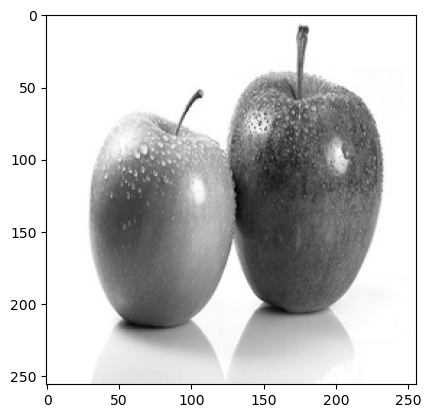

In [2]:
image = cv2.imread('apple.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

## lowering the resolution of the image since the discrete cosine transform is computationally expensive

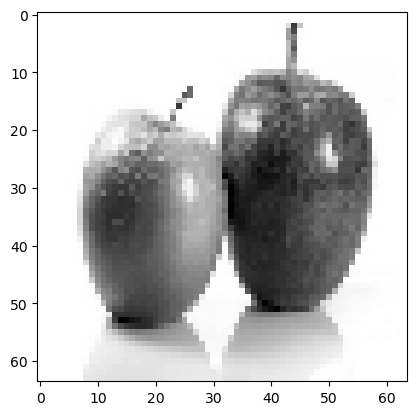

In [3]:
gray_image = cv2.resize(gray_image, (64,64))
plt.imshow(gray_image, cmap='gray')
plt.show()

## Applying the transformation

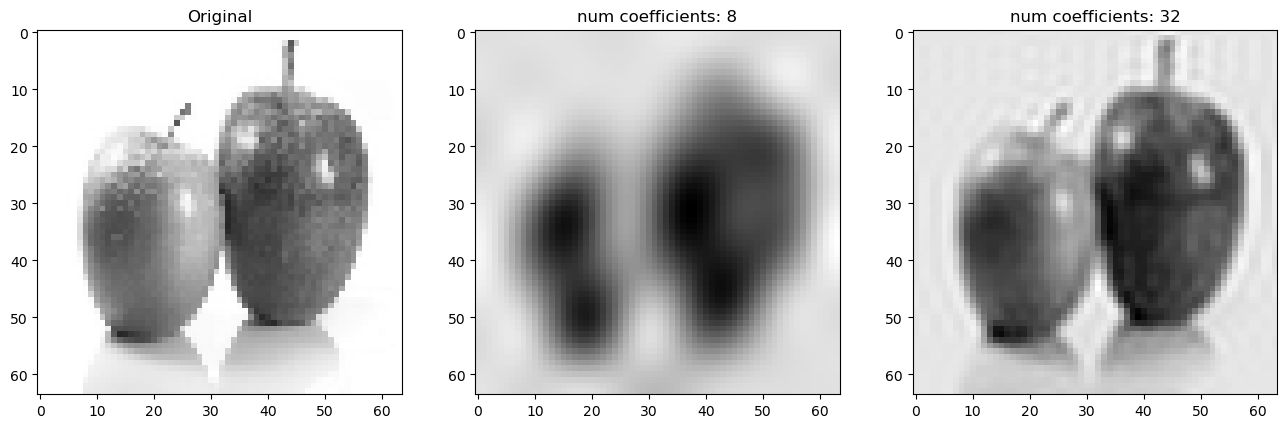

In [4]:
filtered_images = [gray_image]
captions = ['Original']
num_coefs = [8, 32]
for num_coef in num_coefs:
    filtered_images.append(dct_compression(gray_image,num_coef))
    captions.append('num coefficients: ' + str(num_coef))

print_images(filtered_images, 1, len(num_coefs) + 1, captions)